In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [5]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [20]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


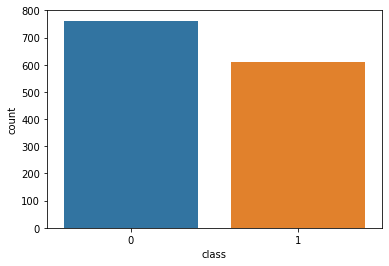

In [17]:
sns.countplot(x='class',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025624CAACF8>,
      dtype=object)

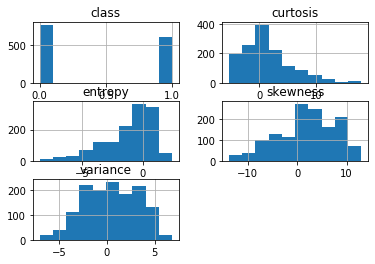

In [22]:
df.hist()

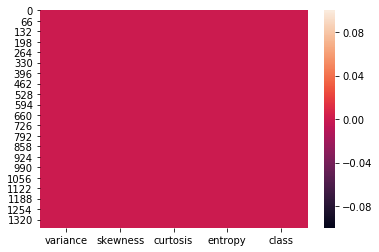

In [23]:
sns.heatmap(df.isnull())

In [30]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [28]:
X.shape

(1372, 4)

In [32]:
y.shape

(1372,)

In [33]:
X_train.shape

(1097, 4)

In [34]:
y_train.shape

(1097,)

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr.score(X_train,y_train)

0.98359161349134

In [39]:
pred=lr.predict(X_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0]
actual price [1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 1 1 0 0 

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
0.025454545454545455


In [44]:
from sklearn.metrics import r2_score
pred=lr.predict(X_test)
print(r2_score(y_test,pred))
print(r2_score(y_test,pred))

0.8960919788405485
0.8960919788405485


In [46]:
svc=SVC()
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[157   0]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [48]:
rbf_svc_conf_matrix = confusion_matrix(y_test, predsvc)
rbf_svc_acc_score = accuracy_score(y_test, predsvc)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[157   0]
 [  0 118]]
100.0


In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
from sklearn.svm import SVC

In [51]:
from sklearn import metrics

In [52]:
svc=SVC(probability=True, kernel='linear')

In [53]:
abc=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test,predsvc)) 

Accuracy: 1.0


In [60]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[157   0]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

